In [1]:
import numpy as np
import pandas as pd

a = pd.read_csv("student_placement_data.csv")
df = a.copy().iloc[:, 1:]
df 

,CGPA,IQ,Placement
0,7.66,122,1
1,6.82,105,0
2,7.29,97,0
3,-2.00,112,1
4,7.41,109,1
...,...,...,...
95,8.48,134,1
96,6.95,105,0
97,6.49,250,0
98,6.97,108,0


In [2]:
cgpa = df.iloc[:, 0].values.reshape(-1,1)           # converting the given array in an 1D array
iq = df.iloc[:, 1].values.reshape(-1,1)
placement = df.iloc[:, 2].values.reshape(-1,1)

data = np.hstack((cgpa, iq, placement))
data_df = pd.DataFrame(data, columns=['cgpa', 'iq', 'placement'])
# print(f"DESCRIBE : \n{data_df.describe()}")

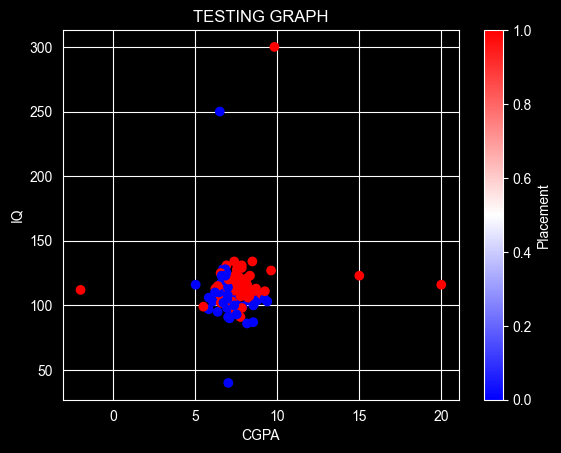

In [3]:
# PLOTTING THE DATA INTO A GRAPH

import matplotlib.pyplot as plt

plt.scatter(cgpa, iq, c=placement, cmap='bwr')  # color by placement
plt.title('TESTING GRAPH')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.colorbar(label='Placement')
# plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



x = data_df[['cgpa', 'iq']]
y = data_df[['placement']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred_ans = regressor.predict(x_test)

y_pred_ans = np.round(y_pred_ans, 1)

pd.DataFrame({"ACTUAL OUTPUT OF y_test" : y_test.squeeze(), "ACQUIRED OUTPUT OF x_test" : y_pred_ans.squeeze()})



,ACTUAL OUTPUT OF y_test,ACQUIRED OUTPUT OF x_test
38,1.0,0.5
6,1.0,0.5
69,1.0,0.5
29,1.0,0.7
72,0.0,0.4
7,1.0,0.5
48,0.0,0.5
39,0.0,0.6
41,0.0,0.5
98,0.0,0.5


As you can see in the above two columns the variance not nearly as close as y_test, its not that predictions are not “wrong” in the Linear Regression sense — it’s just that Linear Regression is not designed for 0/1 classification. To avoid this you have to use "Logistic Regression". 

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_ans)
mse = mean_squared_error(y_test, y_pred_ans)
accuracy = r2_score(y_test, y_pred_ans)
rmse = np.sqrt(mse)

print(f"MAE : {mae}")     
print(f"MSE : {mse}")   
print(f"RMSE : {rmse}")    
print(f"ACCURACT SCORE : {accuracy}")       # closer to 1 = better fit

MAE : 0.5
MSE : 0.281
RMSE : 0.5300943312279429
ACCURACT SCORE : -0.13535353535353534


USING LOGISTIC REGRESSION

In [6]:
from sklearn.linear_model import LogisticRegression


# Features and target
x = data_df[['cgpa', 'iq']].values
y = data_df['placement'].values  # 1D array is preferred for LogisticRegression

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train Logistic Regression model
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Predict on test data
y_pred = clf.predict(x_test)  # predictions will be 0 or 1 automatically

# Compare actual vs predicted
result_df = pd.DataFrame({
    "ACTUAL OUTPUT OF y_test": y_test.squeeze(),
    "ACQUIRED OUTPUT OF x_test": y_pred.squeeze()
})


result_df

,ACTUAL OUTPUT OF y_test,ACQUIRED OUTPUT OF x_test
0,1.0,1.0
1,0.0,0.0
2,0.0,1.0
3,1.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,0.0
7,0.0,1.0
8,1.0,1.0
9,1.0,1.0


In [7]:
from sklearn.metrics import accuracy_score
mae2 = mean_absolute_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)
rmse2 = np.sqrt(mse2)
print(f"MAE : {mae2}")     
print(f"MSE : {mse2}")   
print(f"RMSE : {rmse2}")  
print(f"ACCURACY SCORE : {accuracy2}")      # closer to 1 = better fit

MAE : 0.35
MSE : 0.35
RMSE : 0.5916079783099616
ACCURACY SCORE : 0.65


### Learning the pattern for which the machine was trained

<Axes: >

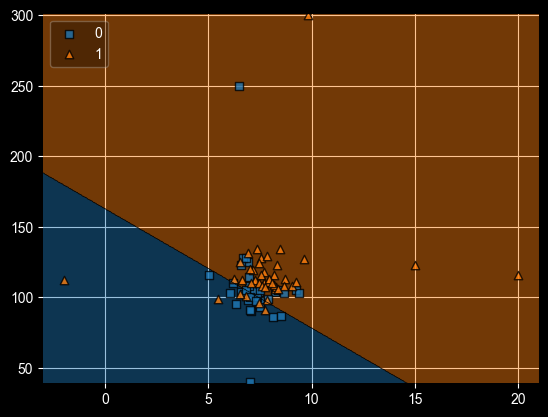

In [8]:
from mlxtend.plotting import plot_decision_regions
y_train = y_train.astype(int)       # as float values will not work on the below code, hence changing its types to integer

# logistic regression line
plot_decision_regions(x_train, y_train, clf=clf, legend=2)


The line btwn blue color and yellow color, the line made by logicstic regression

C:\Users\biswa\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: >

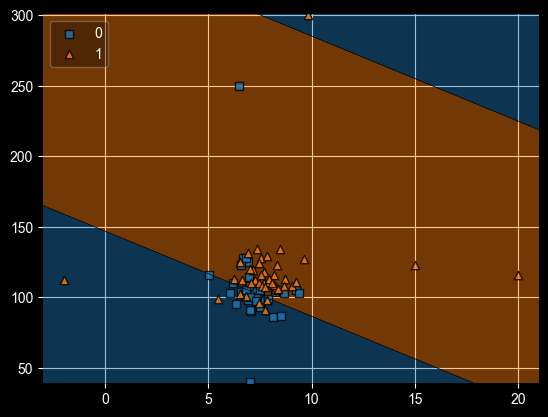

In [9]:
# linear regression line
plot_decision_regions(x_train, y_train, clf=regressor, legend=2)

### The above line that the model learned, converting it into a file, so that you can deploy the model into the server

In [10]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))